In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [16]:
data=pd.read_csv("TSLA.csv")

In [17]:
stock_data=data[["Date","Close"]]

In [18]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data["Close"])
adft

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [19]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

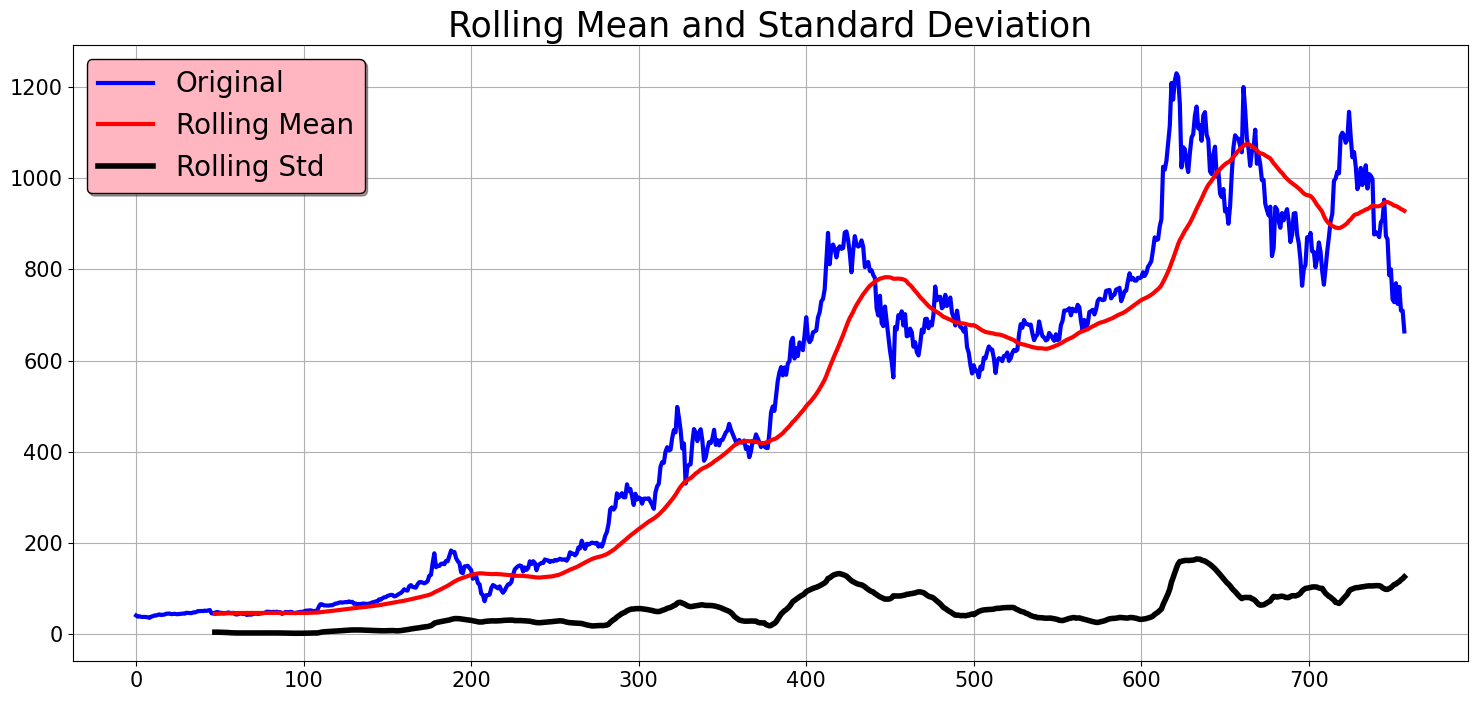

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [20]:
test_stationarity(stock_data.Close)

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


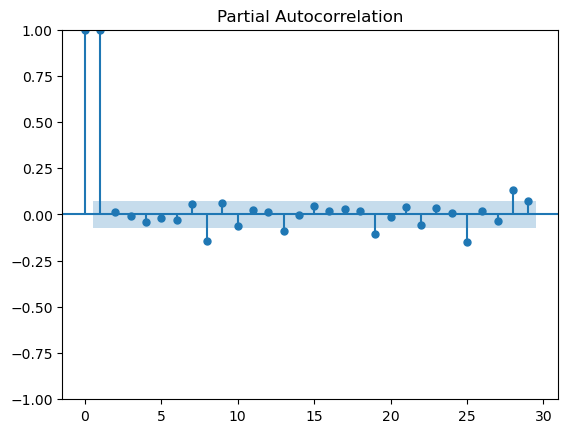

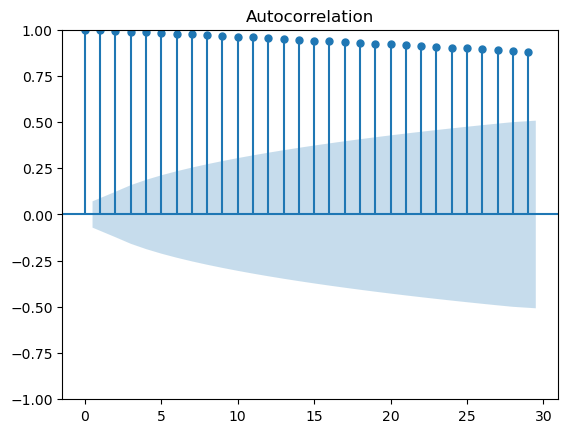

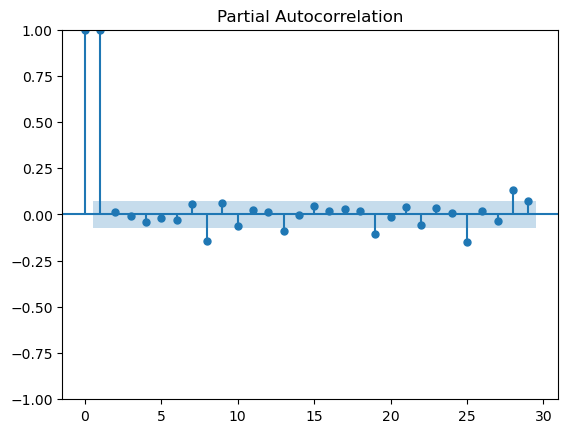

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [22]:
df_close = stock_data.Close

In [23]:
df_close

0       41.015999
1       38.546001
2       39.098000
3       38.125999
4       37.740002
          ...    
753    724.369995
754    761.609985
755    709.809998
756    709.419983
757    663.900024
Name: Close, Length: 758, dtype: float64

In [24]:
df_close.diff()

0            NaN
1      -2.469997
2       0.551998
3      -0.972000
4      -0.385998
         ...    
753   -45.220032
754    37.239990
755   -51.799988
756    -0.390015
757   -45.519958
Name: Close, Length: 758, dtype: float64

In [25]:
df_close = df_close.diff()

In [26]:
df_close = df_close.dropna()

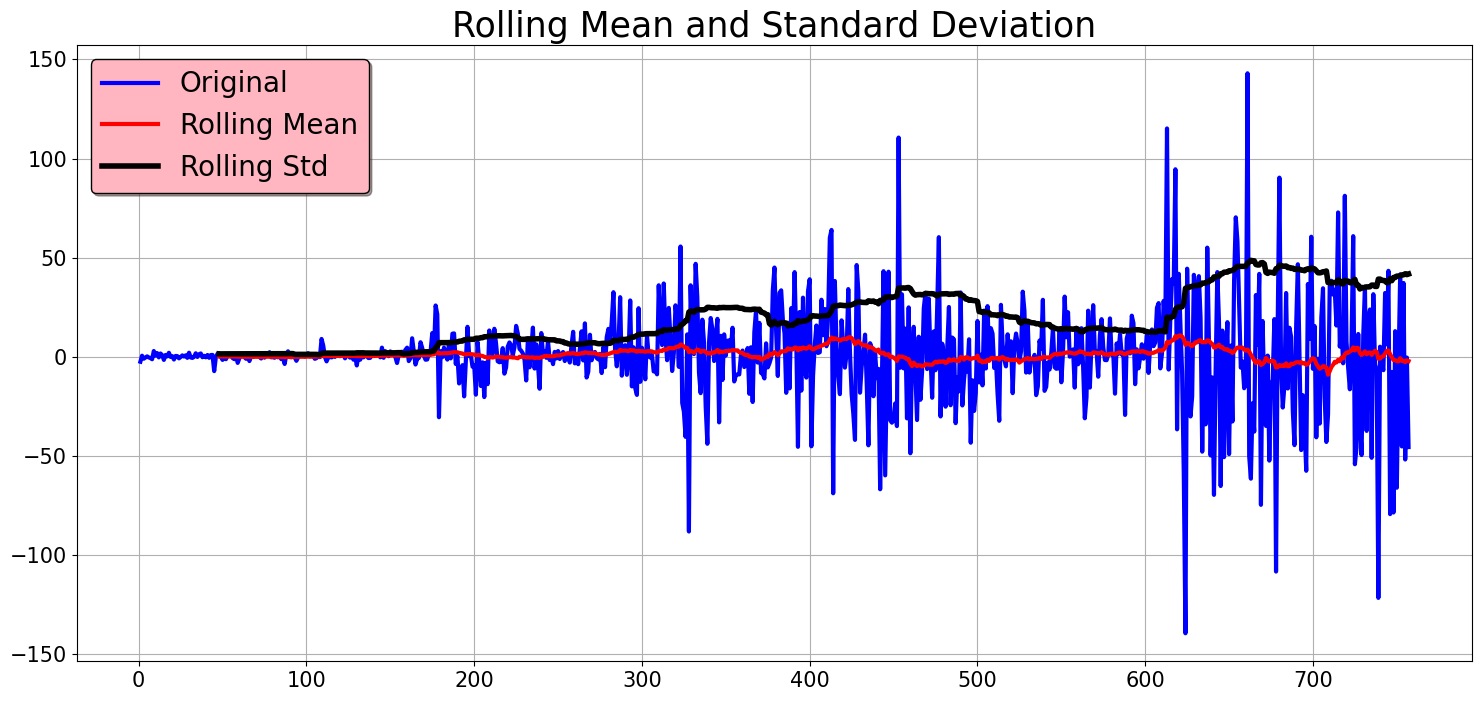

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [27]:
test_stationarity(df_close)

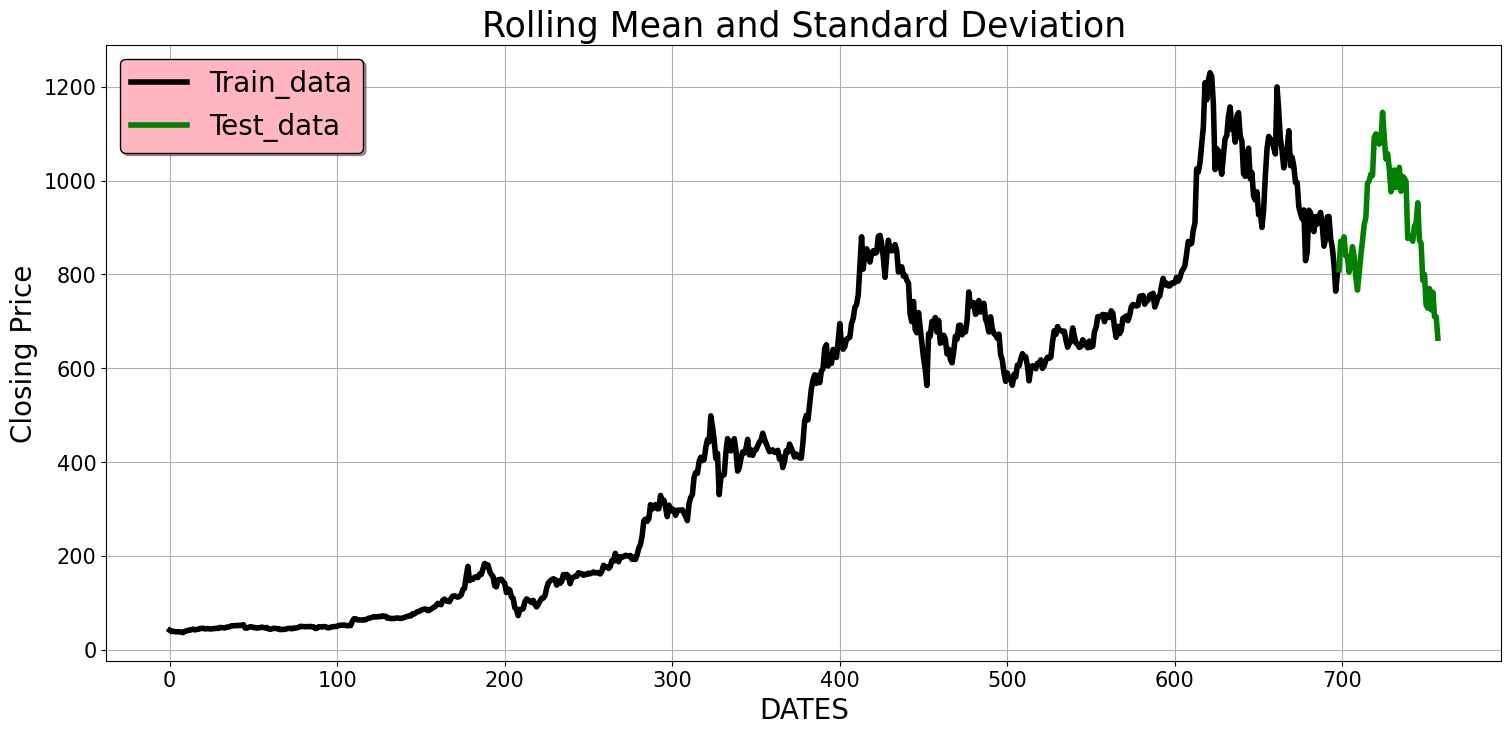

In [70]:
#split data into train and test set
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel("DATES",fontsize = 20)
plt.ylabel("Closing Price", fontsize =20)
plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, color='black', label = 'Train_data',linewidth = 4)
plt.plot(test_data, color='green', label = 'Test_data',linewidth = 4)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [71]:
stock_data['Close']

0       41.015999
1       38.546001
2       39.098000
3       38.125999
4       37.740002
          ...    
753    724.369995
754    761.609985
755    709.809998
756    709.419983
757    663.900024
Name: Close, Length: 758, dtype: float64

In [72]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
history=[x for x in train_data]

In [74]:
model=ARIMA(history,order=(1,1,1))

In [75]:
model = model.fit()

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Wed, 27 Dec 2023   AIC                           6306.700
Time:                        08:25:56   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
model.forecast()

array([800.20438321])

In [78]:
test_data

698     809.869995
699     870.429993
700     864.369995
701     879.890015
702     839.289978
703     838.289978
704     804.580017
705     824.400024
706     858.969971
707     838.299988
708     795.349976
709     766.369995
710     801.890015
711     840.229980
712     871.599976
713     905.390015
714     921.159973
715     993.979980
716     999.109985
717    1013.919983
718    1010.640015
719    1091.839966
720    1099.569946
721    1093.989990
722    1077.599976
723    1084.589966
724    1145.449951
725    1091.260010
726    1045.760010
727    1057.260010
728    1025.489990
729     975.929993
730     986.950012
731    1022.369995
732     985.000000
733    1004.289978
734    1028.150024
735     977.200012
736    1008.780029
737    1005.049988
738     998.020020
739     876.419983
740     881.510010
741     877.510010
742     870.760010
743     902.940002
744     909.250000
745     952.619995
746     873.280029
747     865.650024
748     787.109985
749     800.039978
750     734.

In [79]:
mean_squared_error([test_data[698]], model.forecast())

93.42405358558581

In [80]:
np.sqrt(mean_squared_error([test_data[698]], model.forecast()))

9.665611909526774

In [81]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [82]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    m = 698
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()
        predictions.append(yhat) 
        history.append(y[m])
        m = m +1
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [83]:
#evaluate the different combination of p,d,q for the arima model to get the order for this arima model
def evaluate_model(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score,best_cfg = float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg = rmse,order
                        print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print("Best ARIMA%s RMSE=%.3f" % (best_cfg,best_score))      

In [84]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_model(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=165.491
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(2, 0, 0) RMSE=39.440
Best ARIMA(2, 0, 0) RMSE=39.440


In [87]:
history = [x for x in train_data]
predictions = list()
m = 698
for i in range(len(test_data)):
    model = ARIMA(history, order = (2,0,0))
    model = model.fit()
    fc = model.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[m])
    m=m+1
print(f"my rmse {np.sqrt(mean_squared_error(test_data,predictions))} ")

my rmse 39.43992944070974 


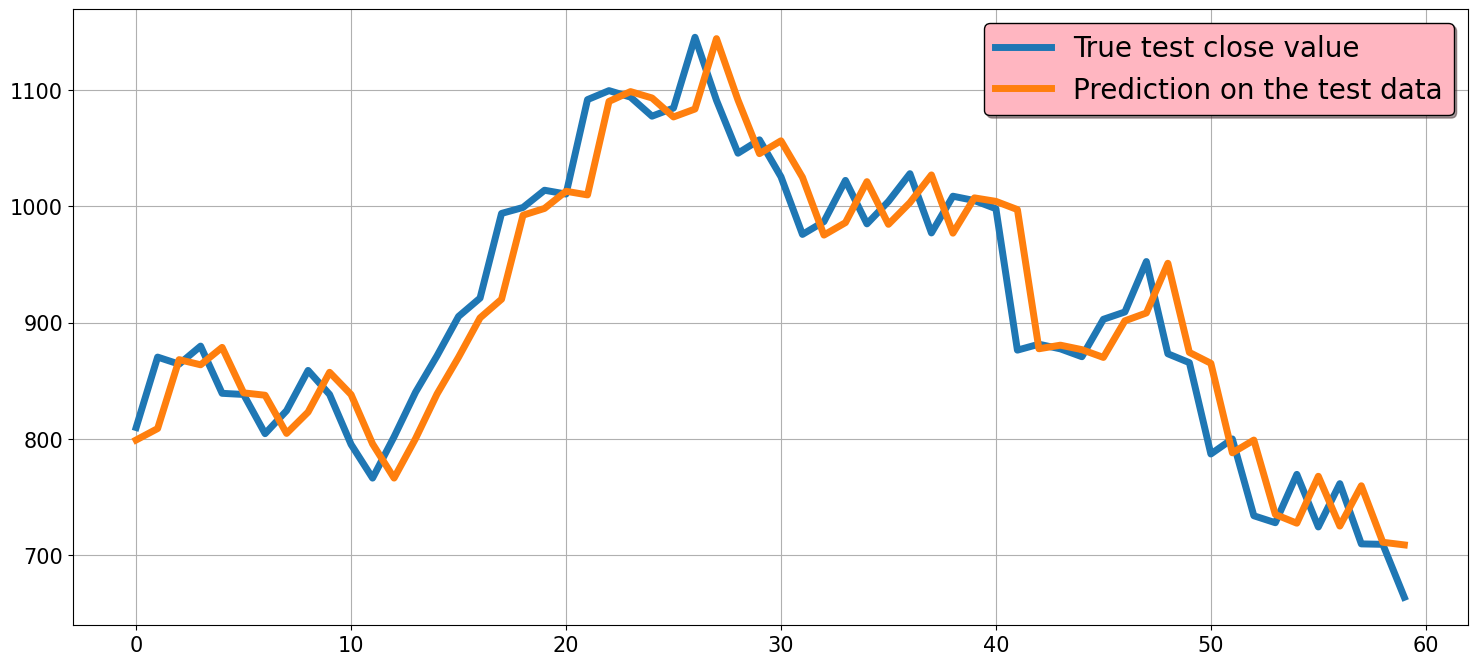

In [88]:
plt.figure(figsize = (18,8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data,label='True test close value', linewidth = 5)
plt.plot(range(len(predictions)), predictions,label='Prediction on the test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [89]:
fc_series = pd.Series(predictions, index=test_data.index)

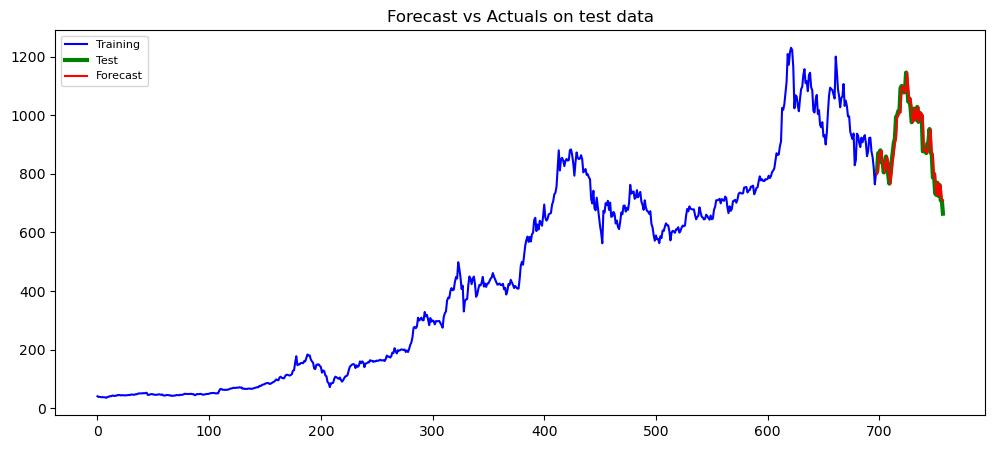

In [90]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

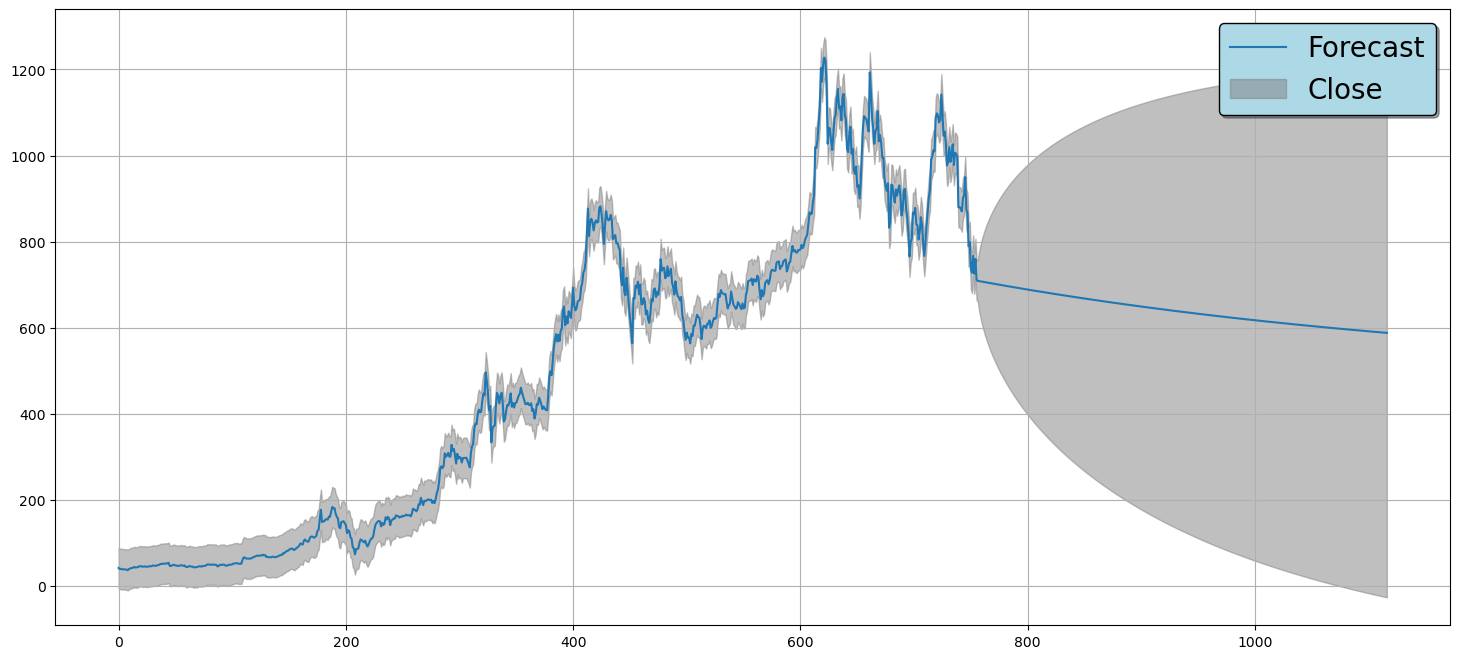

In [95]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model,start=1, end=len(df_close)+360, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [97]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
m = 698
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[m])
    m = m + 1
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54877D+00    |proj g|=  1.28391D-01

At iterate    5    f=  4.50570D+00    |proj g|=  4.34715D-03

At iterate   10    f=  4.50258D+00    |proj g|=  2.85269D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   1.562D-07   4.503D+00
  F =   4.5025716463553653     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54882D+00    |proj g|=  1.28118D-01

At iterate    5    f=  4.50527D+00    |proj g|=  4.39793D-03

At iterate   10    f=  4.50205D+00    |proj g|=  2.51830D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   1.109D-07   4.502D+00
  F =   4.5020489742112790     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55346D+00    |proj g|=  1.33379D-01

At iterate    5    f=  4.51216D+00    |proj g|=  5.52048D-03

At iterate   10    f=  4.50852D+00    |proj g|=  3.64793D-05


 This problem is unconstrained.



At iterate   15    f=  4.50852D+00    |proj g|=  2.24141D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   2.241D-06   4.509D+00
  F =   4.5085188013975417     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55355D+00    |proj g|=  1.32252D-01

At iterate    5    f=  4.51133D+00    |proj g|=  4.16884D-03

At iterate   10    f=  4.50809D+00    |proj g|=  3.24202D-04


 This problem is unconstrained.



At iterate   15    f=  4.50809D+00    |proj g|=  2.03289D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   1.190D-06   4.508D+00
  F =   4.5080914011783646     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55311D+00    |proj g|=  1.34021D-01

At iterate    5    f=  4.51151D+00    |proj g|=  5.42936D-03


 This problem is unconstrained.



At iterate   10    f=  4.50774D+00    |proj g|=  9.32982D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   3.976D-06   4.508D+00
  F =   4.5077433173694921     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55395D+00    |proj g|=  1.33865D-01

At iterate    5    f=  4.51156D+00    |proj g|=  4.01947D-03


 This problem is unconstrained.



At iterate   10    f=  4.50873D+00    |proj g|=  7.26801D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   8.142D-06   4.509D+00
  F =   4.5087239563798258     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55334D+00    |proj g|=  1.34287D-01

At iterate    5    f=  4.51103D+00    |proj g|=  4.04212D-03


 This problem is unconstrained.



At iterate   10    f=  4.50814D+00    |proj g|=  5.23825D-04

At iterate   15    f=  4.50814D+00    |proj g|=  3.37064D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   3.371D-07   4.508D+00
  F =   4.5081366000151339     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55259D+00    |proj g|=  1.35960D-01

At iterate    5    f=  4.51212D+00    |proj g|=  4.47910D-03


 This problem is unconstrained.



At iterate   10    f=  4.50908D+00    |proj g|=  2.03333D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   9.021D-07   4.509D+00
  F =   4.5090720614400137     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55527D+00    |proj g|=  1.30647D-01

At iterate    5    f=  4.51281D+00    |proj g|=  4.22952D-03


 This problem is unconstrained.



At iterate   10    f=  4.50948D+00    |proj g|=  2.45747D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   9.337D-05   4.509D+00
  F =   4.5094806479288687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55614D+00    |proj g|=  1.30388D-01

At iterate    5    f=  4.51334D+00    |proj g|=  4.37436D-03


 This problem is unconstrained.



At iterate   10    f=  4.50988D+00    |proj g|=  1.74625D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.040D-06   4.510D+00
  F =   4.5098794550337340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55589D+00    |proj g|=  1.30603D-01

At iterate    5    f=  4.51315D+00    |proj g|=  4.34890D-03


 This problem is unconstrained.



At iterate   10    f=  4.50976D+00    |proj g|=  4.10944D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   2.271D-06   4.510D+00
  F =   4.5097574025382858     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55697D+00    |proj g|=  1.29826D-01

At iterate    5    f=  4.51461D+00    |proj g|=  4.68003D-03


 This problem is unconstrained.



At iterate   10    f=  4.51080D+00    |proj g|=  1.85089D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   1.221D-06   4.511D+00
  F =   4.5108046618659223     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55921D+00    |proj g|=  1.28063D-01

At iterate    5    f=  4.51673D+00    |proj g|=  5.33567D-03


 This problem is unconstrained.



At iterate   10    f=  4.51202D+00    |proj g|=  9.16283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   7.247D-06   4.512D+00
  F =   4.5120221821728634     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56065D+00    |proj g|=  1.29249D-01

At iterate    5    f=  4.51770D+00    |proj g|=  5.29024D-03


 This problem is unconstrained.



At iterate   10    f=  4.51325D+00    |proj g|=  2.65321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   1.824D-07   4.513D+00
  F =   4.5132487955874350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56311D+00    |proj g|=  1.28951D-01

At iterate    5    f=  4.52040D+00    |proj g|=  6.23529D-03


 This problem is unconstrained.



At iterate   10    f=  4.51550D+00    |proj g|=  1.52810D-04

At iterate   15    f=  4.51550D+00    |proj g|=  4.86606D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   4.866D-06   4.515D+00
  F =   4.5154992768752829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56407D+00    |proj g|=  1.27192D-01

At iterate    5    f=  4.52116D+00    |proj g|=  6.27610D-03


 This problem is unconstrained.



At iterate   10    f=  4.51565D+00    |proj g|=  1.63525D-03

At iterate   15    f=  4.51565D+00    |proj g|=  4.91926D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   4.919D-06   4.516D+00
  F =   4.5156499392660212     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56459D+00    |proj g|=  1.27738D-01

At iterate    5    f=  4.52158D+00    |proj g|=  6.56898D-03


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   5.992D-06   4.517D+00
  F =   4.5166080472790338     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56410D+00    |proj g|=  1.28801D-01

At iterate    5    f=  4.52113D+00    |proj g|=  6.80782D-03

At iterate   10    f=  4.51661D+00    |proj g|=  3.58646D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.250D-05   4.522D+00
  F =   4.5218943483798686     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56668D+00    |proj g|=  1.30274D-01

At iterate    5    f=  4.52420D+00    |proj g|=  3.89304D-03

At iterate   10    f=  4.52125D+00    |proj g|=  6.27641D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   4.217D-06   4.521D+00
  F =   4.5212502528052809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56665D+00    |proj g|=  1.29221D-01

At iterate    5    f=  4.52432D+00    |proj g|=  4.24693D-03


 This problem is unconstrained.



At iterate   10    f=  4.52115D+00    |proj g|=  2.28217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   5.016D-06   4.521D+00
  F =   4.5211494084839021     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56595D+00    |proj g|=  1.30420D-01

At iterate    5    f=  4.52382D+00    |proj g|=  4.18942D-03


 This problem is unconstrained.



At iterate   10    f=  4.52066D+00    |proj g|=  2.42163D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   4.217D-06   4.521D+00
  F =   4.5206645304857718     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57254D+00    |proj g|=  1.25603D-01

At iterate    5    f=  4.53224D+00    |proj g|=  6.91830D-03


 This problem is unconstrained.



At iterate   10    f=  4.52862D+00    |proj g|=  1.92429D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   2.020D-06   4.529D+00
  F =   4.5286196338554188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57170D+00    |proj g|=  1.25812D-01

At iterate    5    f=  4.53165D+00    |proj g|=  6.89813D-03


 This problem is unconstrained.



At iterate   10    f=  4.52815D+00    |proj g|=  6.27374D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   3.643D-05   4.528D+00
  F =   4.5281529732561143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57112D+00    |proj g|=  1.27987D-01

At iterate    5    f=  4.53075D+00    |proj g|=  4.63733D-03


 This problem is unconstrained.



At iterate   10    f=  4.52772D+00    |proj g|=  2.63931D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   3.994D-06   4.528D+00
  F =   4.5277146970814188     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57170D+00    |proj g|=  1.26954D-01


 This problem is unconstrained.



At iterate    5    f=  4.53118D+00    |proj g|=  6.93699D-03

At iterate   10    f=  4.52755D+00    |proj g|=  6.51608D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     17      1     0     0   8.259D-05   4.528D+00
  F =   4.5275457806216268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57132D+00    |proj g|=  1.26926D-01


 This problem is unconstrained.



At iterate    5    f=  4.53082D+00    |proj g|=  7.37764D-03

At iterate   10    f=  4.52704D+00    |proj g|=  8.24450D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   8.003D-06   4.527D+00
  F =   4.5270386634993818     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57286D+00    |proj g|=  1.27804D-01


 This problem is unconstrained.



At iterate    5    f=  4.53334D+00    |proj g|=  6.85456D-03

At iterate   10    f=  4.53014D+00    |proj g|=  7.19851D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   7.199D-06   4.530D+00
  F =   4.5301410405745317     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57792D+00    |proj g|=  1.32761D-01


 This problem is unconstrained.



At iterate    5    f=  4.53677D+00    |proj g|=  3.85251D-03

At iterate   10    f=  4.53373D+00    |proj g|=  5.87719D-04

At iterate   15    f=  4.53372D+00    |proj g|=  1.80025D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   1.800D-06   4.534D+00
  F =   4.5337236171221296     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57959D+00    |proj g|=  1.33124D-01


 This problem is unconstrained.



At iterate    5    f=  4.53836D+00    |proj g|=  3.97879D-03

At iterate   10    f=  4.53527D+00    |proj g|=  2.02217D-04

At iterate   15    f=  4.53527D+00    |proj g|=  3.51612D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   3.516D-06   4.535D+00
  F =   4.5352720327916307     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57929D+00    |proj g|=  1.31800D-01


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.53749D+00    |proj g|=  3.82918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   2.356D-07   4.535D+00
  F =   4.5346178670679604     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58089D+00    |proj g|=  1.30548D-01

At iterate    5    f=  4.53841D+00    |proj g|=  3.90758D-03

At iterate   10    f=  4.53538D+00    |proj g|=  3.34566D-05

       

 This problem is unconstrained.



At iterate   10    f=  4.53721D+00    |proj g|=  1.05478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   1.648D-07   4.537D+00
  F =   4.5372100804701256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58201D+00    |proj g|=  1.30312D-01

At iterate    5    f=  4.53988D+00    |proj g|=  4.16192D-03


 This problem is unconstrained.



At iterate   10    f=  4.53655D+00    |proj g|=  9.02152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   6.139D-07   4.537D+00
  F =   4.5365535336402019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58200D+00    |proj g|=  1.34323D-01

At iterate    5    f=  4.54187D+00    |proj g|=  5.59969D-03


 This problem is unconstrained.



At iterate   10    f=  4.53751D+00    |proj g|=  2.20652D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   6.169D-06   4.538D+00
  F =   4.5375060708534338     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58287D+00    |proj g|=  1.32072D-01

At iterate    5    f=  4.54174D+00    |proj g|=  6.38010D-03


 This problem is unconstrained.



At iterate   10    f=  4.53803D+00    |proj g|=  1.21393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   6.194D-06   4.538D+00
  F =   4.5380275159251680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58223D+00    |proj g|=  1.32207D-01

At iterate    5    f=  4.54118D+00    |proj g|=  6.42611D-03


 This problem is unconstrained.



At iterate   10    f=  4.53748D+00    |proj g|=  1.12324D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   7.068D-06   4.537D+00
  F =   4.5374803833409407     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58265D+00    |proj g|=  1.34993D-01

At iterate    5    f=  4.54215D+00    |proj g|=  5.12415D-03


 This problem is unconstrained.



At iterate   10    f=  4.53749D+00    |proj g|=  1.22467D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   4.460D-06   4.537D+00
  F =   4.5374836051234393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58328D+00    |proj g|=  1.33019D-01

At iterate    5    f=  4.54345D+00    |proj g|=  5.87236D-03


 This problem is unconstrained.



At iterate   10    f=  4.53915D+00    |proj g|=  2.76075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   6.439D-06   4.539D+00
  F =   4.5391413364953781     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58276D+00    |proj g|=  1.33082D-01

At iterate    5    f=  4.54339D+00    |proj g|=  5.37981D-03


 This problem is unconstrained.



At iterate   10    f=  4.53904D+00    |proj g|=  1.63278D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   2.834D-06   4.539D+00
  F =   4.5390366297751683     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58257D+00    |proj g|=  1.33238D-01

At iterate    5    f=  4.54243D+00    |proj g|=  6.37511D-03


 This problem is unconstrained.



At iterate   10    f=  4.53843D+00    |proj g|=  2.37748D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   7.110D-06   4.538D+00
  F =   4.5384251282499024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58286D+00    |proj g|=  1.33065D-01

At iterate    5    f=  4.54157D+00    |proj g|=  6.15481D-03


 This problem is unconstrained.



At iterate   10    f=  4.53779D+00    |proj g|=  1.30373D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   3.923D-06   4.538D+00
  F =   4.5377868337687950     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60447D+00    |proj g|=  1.28290D-01

At iterate    5    f=  4.56252D+00    |proj g|=  5.06699D-03


 This problem is unconstrained.



At iterate   10    f=  4.55903D+00    |proj g|=  1.34881D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   8.431D-07   4.559D+00
  F =   4.5590262250215039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60358D+00    |proj g|=  1.28758D-01

At iterate    5    f=  4.56201D+00    |proj g|=  5.96045D-03


 This problem is unconstrained.



At iterate   10    f=  4.55839D+00    |proj g|=  6.05124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   2.606D-06   4.558D+00
  F =   4.5583910320275125     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60397D+00    |proj g|=  1.29430D-01

At iterate    5    f=  4.56147D+00    |proj g|=  5.44465D-03


 This problem is unconstrained.



At iterate   10    f=  4.55776D+00    |proj g|=  2.55953D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   2.560D-05   4.558D+00
  F =   4.5577641190401872     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60340D+00    |proj g|=  1.28365D-01

At iterate    5    f=  4.56096D+00    |proj g|=  4.08188D-03



 This problem is unconstrained.


At iterate   10    f=  4.55731D+00    |proj g|=  4.57367D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.118D-06   4.557D+00
  F =   4.5573050734396290     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60362D+00    |proj g|=  1.28147D-01

At iterate    5    f=  4.56141D+00    |proj g|=  4.05144D-03


 This problem is unconstrained.



At iterate   10    f=  4.55779D+00    |proj g|=  1.78669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.714D-06   4.558D+00
  F =   4.5577839041900967     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60312D+00    |proj g|=  1.28556D-01

At iterate    5    f=  4.56132D+00    |proj g|=  4.84430D-03


 This problem is unconstrained.



At iterate   10    f=  4.55738D+00    |proj g|=  9.64370D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   4.851D-06   4.557D+00
  F =   4.5573761087884197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60206D+00    |proj g|=  1.38073D-01

At iterate    5    f=  4.56480D+00    |proj g|=  1.58107D-02


 This problem is unconstrained.



At iterate   10    f=  4.55855D+00    |proj g|=  1.16990D-02

At iterate   15    f=  4.55842D+00    |proj g|=  1.32996D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   1.330D-06   4.558D+00
  F =   4.5584178634436876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61306D+00    |proj g|=  1.33944D-01


 This problem is unconstrained.



At iterate    5    f=  4.57117D+00    |proj g|=  5.46742D-03

At iterate   10    f=  4.56586D+00    |proj g|=  2.04571D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   8.072D-07   4.566D+00
  F =   4.5658491328243622     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61295D+00    |proj g|=  1.33696D-01

At iterate    5    f=  4.57014D+00    |proj g|=  6.61813D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   3.786D-06   4.565D+00
  F =   4.5652049670236954     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61771D+00    |proj g|=  1.34589D-01

At iterate    5    f=  4.57764D+00    |proj g|=  6.44944D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61756D+00    |proj g|=  1.33186D-01

At iterate    5    f=  4.57633D+00    |proj g|=  4.54556D-03

At iterate   10    f=  4.57274D+00    |proj g|=  1.56471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   3.874D-06   4.573D+00
  F =   4.5727386115707409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate   10    f=  4.57609D+00    |proj g|=  5.33290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     17      1     0     0   3.976D-06   4.576D+00
  F =   4.5760873660679264     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61918D+00    |proj g|=  1.30625D-01

At iterate    5    f=  4.57881D+00    |proj g|=  3.85304D-03


 This problem is unconstrained.



At iterate   10    f=  4.57561D+00    |proj g|=  6.33804D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   3.520D-05   4.576D+00
  F =   4.5756078830601465     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62030D+00    |proj g|=  1.33066D-01

At iterate    5    f=  4.58120D+00    |proj g|=  6.22916D-03


 This problem is unconstrained.



At iterate   10    f=  4.57691D+00    |proj g|=  8.87147D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   3.731D-07   4.577D+00
  F =   4.5769108008339456     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62155D+00    |proj g|=  1.32572D-01

At iterate    5    f=  4.58178D+00    |proj g|=  5.61712D-03


 This problem is unconstrained.



At iterate   10    f=  4.57775D+00    |proj g|=  3.96778D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   3.117D-06   4.578D+00
  F =   4.5777540652428765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62303D+00    |proj g|=  1.34797D-01

At iterate    5    f=  4.58347D+00    |proj g|=  4.98585D-03


 This problem is unconstrained.



At iterate   10    f=  4.57833D+00    |proj g|=  1.08830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     16      1     0     0   2.059D-05   4.578D+00
  F =   4.5783252102459890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62587D+00    |proj g|=  1.35303D-01

At iterate    5    f=  4.58531D+00    |proj g|=  6.58794D-03


 This problem is unconstrained.



At iterate   10    f=  4.58095D+00    |proj g|=  2.86190D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   2.475D-05   4.581D+00
  F =   4.5809508782938169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62578D+00    |proj g|=  1.36616D-01

At iterate    5    f=  4.58520D+00    |proj g|=  6.44736D-03


 This problem is unconstrained.



At iterate   10    f=  4.58043D+00    |proj g|=  2.65324D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   3.683D-06   4.580D+00
  F =   4.5804337652543738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RMSE of SARIMA Model: 39.73948207869256


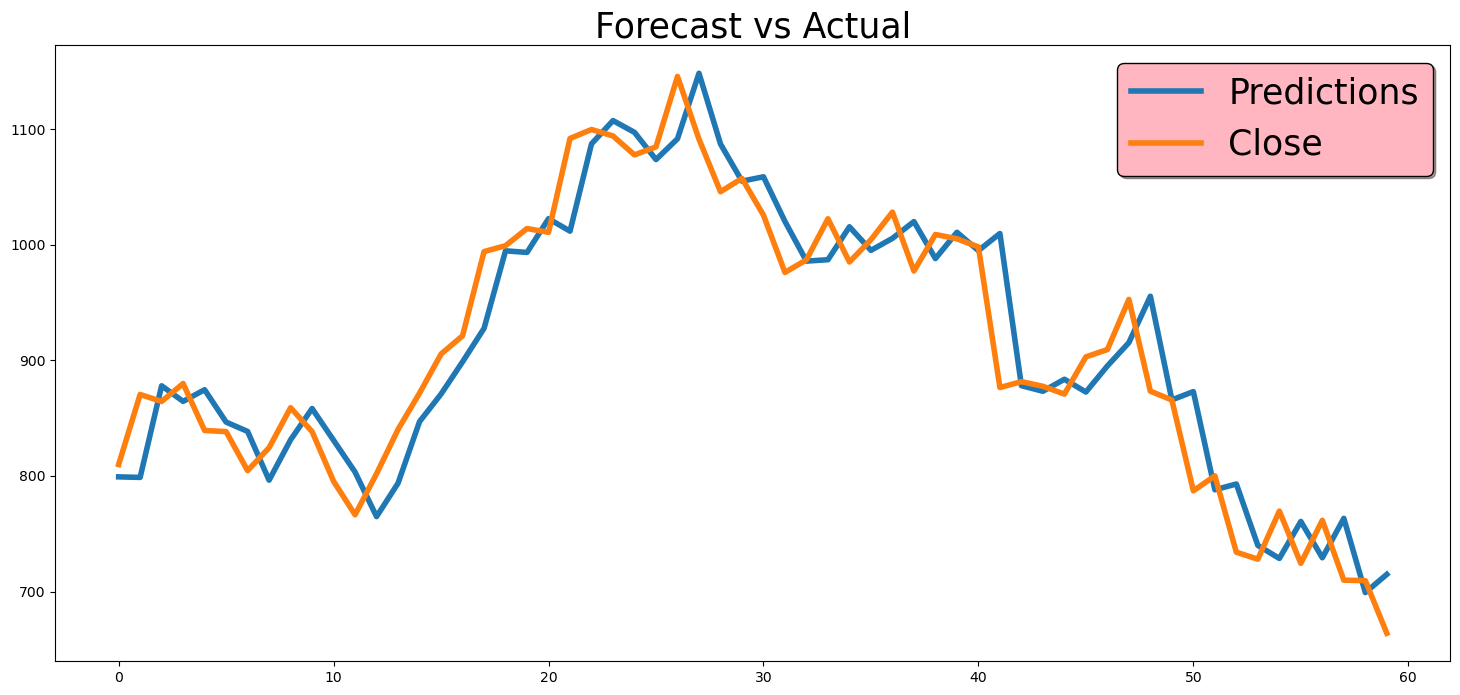

In [98]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')